# Lending Club Case Study

## Problem statement :

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.





## Objective:

* The company wants to identify risky loan applicants(Default), then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is one of the aim.

* The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

### Importing libraries

In [1]:
import pandas as pd # for data manipulation in python
import numpy as np # for numerical computing in python
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for beautiful visualization and work in sync with matplotlib
import warnings
warnings.filterwarnings("ignore") # to remove package deprecation warning

### Data loading and Understanding

In [2]:
df=pd.read_csv("loan.csv",header=0)

In [3]:
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.shape

(39717, 111)

### In the original dataset, there are 39717 rows and 111 columns

In [5]:
# to print all the columns
print(df.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


In [6]:
# to check info about each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Note: To see full view we use pd.set_options and for default view pd.reset_options

In [7]:
# full view
#pd.set_option("max_rows", None)
#pd.set_option('display.max_columns', None) 

# to go to default view
#pd.reset_option('^display.', silent=True)

### Data Cleaning and Manipulation

In [8]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [9]:
# printing target variable
df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

### In target variable "current" category is not useful as they are in process of paying the loan right now, therefore its hard to guess whether they will pay or not so they are not important for our analysis as we are only interested in knowing who is going to default and who is not going to default. So we can remove records with loan status as current.

In [10]:
#removing records with loan status equal to current
df=df[df["loan_status"]!="Current"]
df.shape

(38577, 111)

In [11]:
# checking duplicate rows
# By default, for each set of duplicated values, the first occurrence is set on False and all others are True.

print(df.duplicated().sum())

0


In [12]:
#checking missing values
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               38577
total_bal_ex_mort             38577
total_bc_limit                38577
total_il_high_credit_limit    38577
Length: 111, dtype: int64

In [13]:
# checking missing values percentage
print(type(100*df.isnull().mean()))
100*df.isnull().mean()

<class 'pandas.core.series.Series'>


id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.101097
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

### Columns which have more than 30 percent missing values, removing them as they are not beneficial, because even if we impute them, most of the values remain same and which will not help in our analysis.

In [14]:
# making list of columns that have high missing values that we want to remove
rmcols=[]
for i in df.columns:
    if(df[i].isnull().mean()*100>=30.00):
        rmcols.append(i)
        
print(len(rmcols))
rmcols

58


['desc',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_pa

In [15]:
# Removing these columns
df=df.drop(rmcols,axis=1)

In [16]:
df.shape

(38577, 53)

In [17]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [18]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  object 
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  37544 non-null  object 
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  385

In [20]:
#checking unique values column wise
for i in df.columns:
    print(i,df[i].nunique())

id 38577
member_id 38577
loan_amnt 870
funded_amnt 1019
funded_amnt_inv 8050
term 2
int_rate 370
installment 15022
grade 7
sub_grade 35
emp_title 28027
emp_length 11
home_ownership 5
annual_inc 5215
verification_status 3
issue_d 55
loan_status 2
pymnt_plan 1
url 38577
purpose 14
title 19297
zip_code 822
addr_state 50
dti 2853
delinq_2yrs 11
earliest_cr_line 524
inq_last_6mths 9
open_acc 40
pub_rec 5
revol_bal 21275
revol_util 1088
total_acc 82
initial_list_status 1
out_prncp 1
out_prncp_inv 1
total_pymnt 36714
total_pymnt_inv 36387
total_rec_prncp 6841
total_rec_int 34025
total_rec_late_fee 1320
recoveries 4040
collection_recovery_fee 2616
last_pymnt_d 101
last_pymnt_amnt 34418
last_credit_pull_d 106
collections_12_mths_ex_med 1
policy_code 1
application_type 1
acc_now_delinq 1
chargeoff_within_12_mths 1
delinq_amnt 1
pub_rec_bankruptcies 3
tax_liens 1


### Removing unnecessary and irrelevant columns either index type column which has all distinct value or columns which have only one value or column which have more than 50 percent distinct value as they are useless(as for each category there are merely two observations will be there).

### Columns which we are dropping

1. id : A unique ID assigned to each loan applicant. 
2. member_id - A unique assigned ID for each borrower member.
3. emp_title : The job title supplied by the Borrower when applying for the loan.
4. url : URL for the LC page with listing data.This column cannot be used as a driving factors behind loan default.
5. title : The loan title provided by the borrower.
6. zip_code : The first 3 numbers of the zip code provided by the borrower in the loan application.
7. pymnt_plan : Indicates if a payment plan has been put in place for the loan
8. initial_list_status : The initial listing status of the loan. Possible values are – W, F
9. collections_12_mths_ex_med : Number of collections in 12 months excluding medical collections
10. policy_code : publicly available policy_code=1, new products not publicly available policy_code=2
11. application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
12. acc_now_delinq : The number of accounts on which the borrower is now delinquent. 
13. chargeoff_within_12_mths : Number of charge-offs within 12 months 
14. delinq_amnt : The past-due amount owed for the accounts on which the borrower is now delinquent.
15. tax_liens : Number of tax liens
16. emp_title : The job title supplied by the Borrower when applying for the loan.*




In [21]:
colstodrop=["id","member_id","pymnt_plan","initial_list_status","url","collections_12_mths_ex_med","policy_code","application_type","acc_now_delinq","chargeoff_within_12_mths","delinq_amnt","tax_liens","title","emp_title","zip_code"]
df=df.drop(colstodrop,axis=1)

In [22]:
df.shape

(38577, 38)

In [23]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

### Out of these many columns, some customer behavorial variable are present(those which are generated after 
### loan is approved like delinq_2yrs, revol_bal etc.). We can remove them. Below is list

* delinq_2yrs : Number of times a borrower's installment is due for than 30 days in past 2 years.
* earliest_cr_line : The month the borrower's earliest reported credit line was opened.
* inq_last_6mths : The number of inquiries in past 6 months.
* open_acc : The number of open credit lines in the borrower's credit file.
* pub_rec : Number of derogatory public records
* revol_bal : Total credit revolving balance.
* revol_util : The amount of credit the borrower is using relative to all available revolving credit.
* total_acc :  The total number of credit lines currently in the borrower's credit file
* out_prncp : Remaining outstanding principal for total amount funded
* out_prncp_inv : Remaining outstanding principal for portion of total amount funded by investors
* total_pymnt : Payments received to date for total amount funded.
* total_pymnt_inv : Payments received to date for portion of total amount funded by investors.
* total_rec_prncp : Principal received to date.
* total_rec_int : Interest received to date.
* total_rec_late_fee : Late fees received to date.
* recoveries : post charge off gross recovery.
* collection_recovery_fee : post charge off collection fee.
* last_pymnt_d : The Last Payment month.
* last_pymnt_amnt: Last total payment amount received.
* last_credit_pull_d : The most recent month LC pulled credit or credit enquiry for this loan.
* pub_rec_bankruptcies : Number of public record bankruptcies










In [24]:
df=df.drop(['delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],axis=1)

In [25]:
df.shape

(38577, 17)

In [26]:
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  object 
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_length           37544 non-null  object 
 9   home_ownership       38577 non-null  object 
 10  annual_inc           38577 non-null  float64
 11  verification_status  38577 non-null  object 
 12  issue_d              38577 non-null  object 
 13  loan_status          38577 non-null  object 
 14  purpose              38577 non-null  object 
 15  addr_state           38577 non-null 

### Checking value counts and dtype of each column to check type of values variables are taking and their datatype

In [27]:
for i in df.columns:
    print(i,"  ",df[i].dtype,"\n",df[i].value_counts(),"\n\n")

loan_amnt    int64 
 10000    2809
12000    2248
5000     2028
6000     1886
15000    1838
         ... 
18325       1
9650        1
20450       1
15425       1
22550       1
Name: loan_amnt, Length: 870, dtype: int64 


funded_amnt    int64 
 10000    2719
12000    2161
5000     2017
6000     1876
15000    1732
         ... 
1650        1
30100       1
19675       1
21275       1
22350       1
Name: funded_amnt, Length: 1019, dtype: int64 


funded_amnt_inv    float64 
 5000.000000     1294
10000.000000    1264
6000.000000     1182
12000.000000    1016
8000.000000      887
                ... 
5913.729658        1
24240.110000       1
16458.930000       1
18911.950000       1
7959.595570        1
Name: funded_amnt_inv, Length: 8050, dtype: int64 


term    object 
  36 months    29096
 60 months     9481
Name: term, dtype: int64 


int_rate    object 
 10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%  

### Clarification of certain terms:
* delinq: Delinquency means that you are behind on payments.
* default: Once you are delinquent for a certain period of time, your lender will declare the loan to be in default. 

### Handling incorrect datatype

In [28]:
# clearly int_rate is object type but it should be treated as continuous type


In [29]:
# changing datatype and processing of int_rate and revol_util
df["int_rate"]=df["int_rate"].astype("str")
df["int_rate"]=df["int_rate"].apply(lambda x: float(x.replace("%","")))



In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  float64
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_length           37544 non-null  object 
 9   home_ownership       38577 non-null  object 
 10  annual_inc           38577 non-null  float64
 11  verification_status  38577 non-null  object 
 12  issue_d              38577 non-null  object 
 13  loan_status          38577 non-null  object 
 14  purpose              38577 non-null  object 
 15  addr_state           38577 non-null 

### Filling missing value(Imputation)

In [31]:
df.isnull().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1033
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
dtype: int64

In [32]:
# Thre are missing values in 1 column filling them
# for categorical variable filling them with mode 
# for continuous variable based on outlier fill them with mean or median

In [33]:
# filling emp_length
print(df["emp_length"].value_counts())


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64


In [34]:
df["emp_length"]=df["emp_length"].fillna(df["emp_length"].mode()[0])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  float64
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_length           38577 non-null  object 
 9   home_ownership       38577 non-null  object 
 10  annual_inc           38577 non-null  float64
 11  verification_status  38577 non-null  object 
 12  issue_d              38577 non-null  object 
 13  loan_status          38577 non-null  object 
 14  purpose              38577 non-null  object 
 15  addr_state           38577 non-null 

### Outliers checking and Handling


In [36]:
# plotting boxplot for outlier checking
plt.style.use("default")

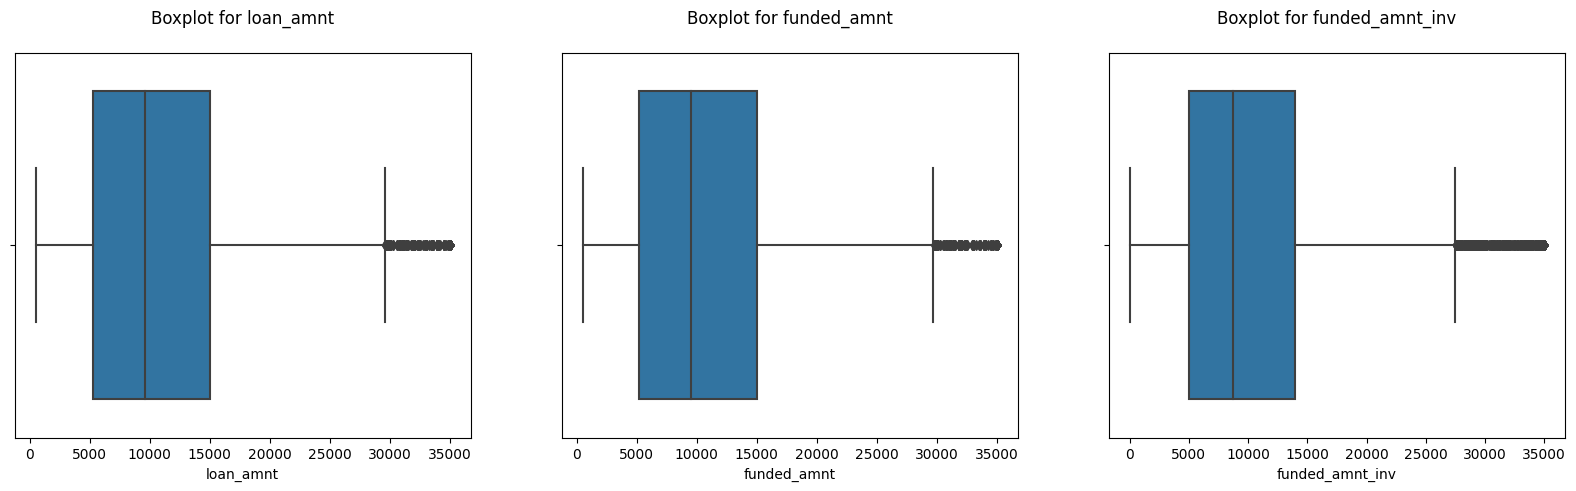

In [37]:
fig = plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.title("Boxplot for loan_amnt\n")
sns.boxplot(df["loan_amnt"])


plt.subplot(1,3,2)
plt.title("Boxplot for funded_amnt\n",)
sns.boxplot(df["funded_amnt"])


plt.subplot(1,3,3)
plt.title("Boxplot for funded_amnt_inv\n",)
sns.boxplot(df["funded_amnt_inv"])


plt.show()

### Based on graphs these seems like genuine outlier, so no need to remove them as most of the loan amnt ranges in range of 5k to 15k there can be some loan which may be around 30 or 35k

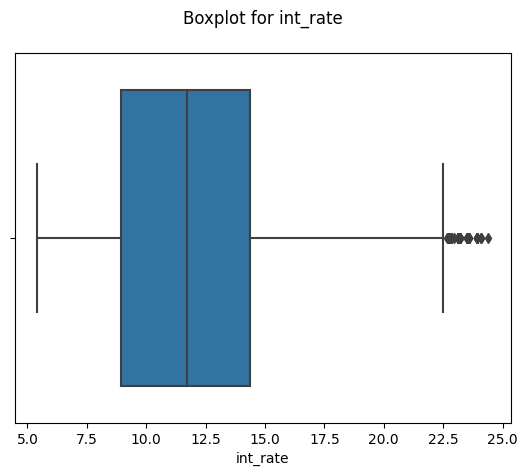

In [38]:
plt.title("Boxplot for int_rate\n")
sns.boxplot(df["int_rate"])
plt.show()

### Based on graph these seems like genuine outlier, so no need to remove them

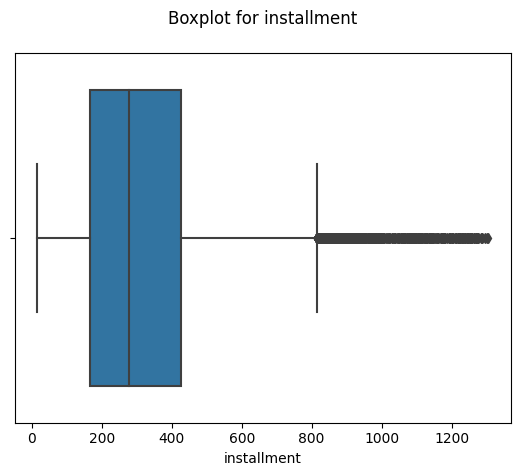

In [39]:
plt.title("Boxplot for installment\n")
sns.boxplot(df["installment"])
plt.show()

### Based on graph these seem like genuine outlier, so no need to remove them

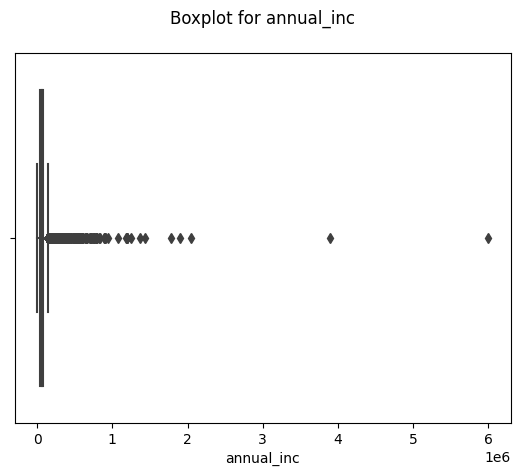

In [40]:
plt.title("Boxplot for annual_inc\n")
sns.boxplot(df["annual_inc"])
plt.show()

### There are lot of outlier and they are too far so we may need to treat outliers here

In [41]:
df["annual_inc"].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [42]:
iqr=np.percentile(df["annual_inc"],75)-np.percentile(df["annual_inc"],25)
print("inter quartile range is",iqr)
lb=np.percentile(df["annual_inc"],25)-1.5*iqr
ub=np.percentile(df["annual_inc"],75)+1.5*iqr
print("low range is",lb," high range is ",ub)
print("95th percentile is ",np.percentile(df["annual_inc"],95))

inter quartile range is 42000.0
low range is -23000.0  high range is  145000.0
95th percentile is  140004.0


In [43]:
df[(df["annual_inc"]>=ub) | (df["annual_inc"]<=lb) ].shape

(1823, 17)

### Capping the outliers based on iqr range

In [44]:
df["annual_inc"]=np.where(df["annual_inc"]>=ub, ub, df["annual_inc"])

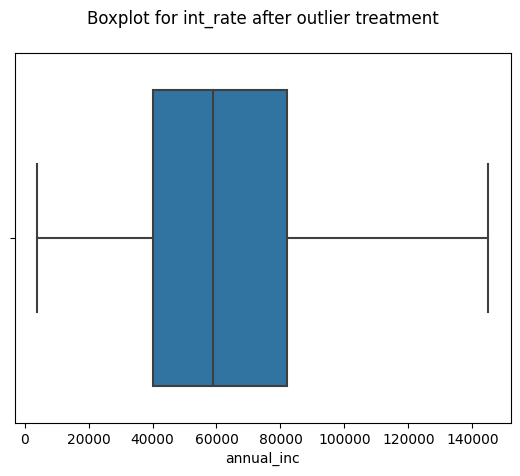

In [45]:
# plotting boxplot after outlier removal
plt.title("Boxplot for int_rate after outlier treatment\n")
sns.boxplot(df["annual_inc"])
plt.show()

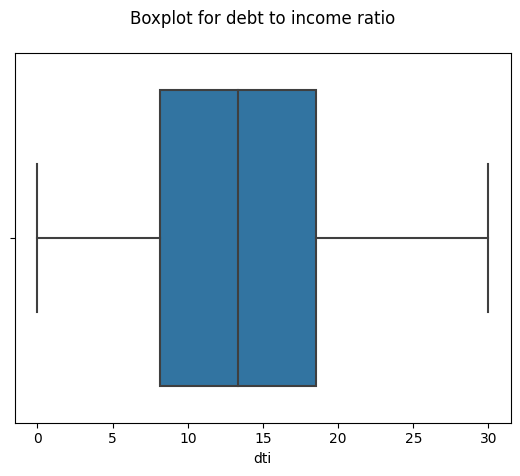

In [46]:
plt.title("Boxplot for debt to income ratio\n")
sns.boxplot(df["dti"])
plt.show()

### There is no outlier in debt to income ratio

### Sanity Check

In [47]:
# loan amount should be greater than or equal to funded_amnt
print(df[df["loan_amnt"]<df["funded_amnt"]].shape)

# funded amnt should be less than funded_amnt_inv
print(df[df["funded_amnt"]<df["funded_amnt_inv"]].shape)


(0, 17)
(0, 17)


### Since no observations(0 rows) are there, it justifies the logic.

### Converting date type into proper format

In [48]:
df["issue_d"].dtype,df["issue_d"].value_counts()

(dtype('O'),
 Nov-11    2062
 Dec-11    2042
 Oct-11    1941
 Sep-11    1913
 Aug-11    1798
 Jul-11    1745
 Jun-11    1728
 May-11    1609
 Apr-11    1559
 Mar-11    1442
 Jan-11    1380
 Feb-11    1297
 Dec-10    1267
 Oct-10    1132
 Nov-10    1121
 Jul-10    1119
 Sep-10    1086
 Aug-10    1078
 Jun-10    1029
 May-10     920
 Apr-10     827
 Mar-10     737
 Feb-10     627
 Nov-09     602
 Dec-09     598
 Jan-10     589
 Oct-09     545
 Sep-09     449
 Aug-09     408
 Jul-09     374
 Jun-09     356
 May-09     319
 Apr-09     290
 Mar-09     276
 Feb-09     260
 Jan-09     239
 Mar-08     236
 Dec-08     223
 Nov-08     184
 Feb-08     174
 Jan-08     171
 Apr-08     155
 Oct-08      96
 Dec-07      85
 Jul-08      83
 May-08      71
 Aug-08      71
 Jun-08      66
 Oct-07      47
 Nov-07      37
 Aug-07      33
 Sep-08      32
 Jul-07      30
 Sep-07      18
 Jun-07       1
 Name: issue_d, dtype: int64)

In [49]:
df["issue_d"]=df["issue_d"].apply(lambda x: "01-"+x)

In [50]:
df["issue_d"]

0        01-Dec-11
1        01-Dec-11
2        01-Dec-11
3        01-Dec-11
5        01-Dec-11
           ...    
39712    01-Jul-07
39713    01-Jul-07
39714    01-Jul-07
39715    01-Jul-07
39716    01-Jun-07
Name: issue_d, Length: 38577, dtype: object

In [51]:
df["issue_d_mnth"]=pd.DatetimeIndex(df["issue_d"]).month

### Using type driven metrics above we derived month from issue date column.

In [52]:
#deleting issue_d column
df=df.drop("issue_d",axis=1)

In [53]:
df.shape

(38577, 17)

In [54]:
df.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,issue_d_mnth
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,12
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,12
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,12
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,12
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,12


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  float64
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_length           38577 non-null  object 
 9   home_ownership       38577 non-null  object 
 10  annual_inc           38577 non-null  float64
 11  verification_status  38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  addr_state           38577 non-null  object 
 15  dti                  38577 non-null 

## Univariate Analysis

### for categorical analysis we will do count plot and for continuous we will do histogram as boxplot we have plotted above.

### Categorical variable

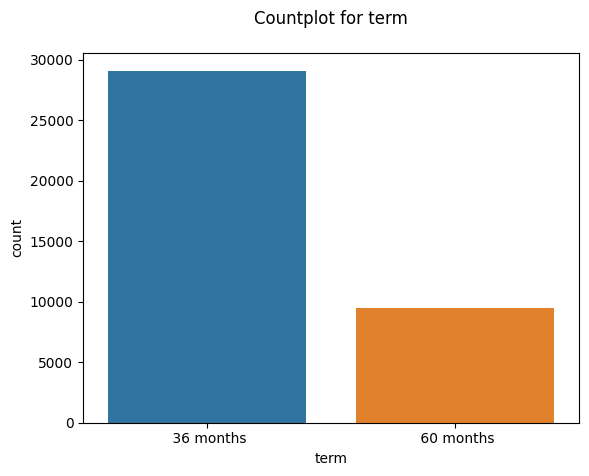

In [56]:
# for term
plt.title("Countplot for term\n")
sns.countplot(df["term"],order = df["term"].value_counts().index)
plt.show()

### clearly most of applicants have taken 3 years loan compare to 5 years

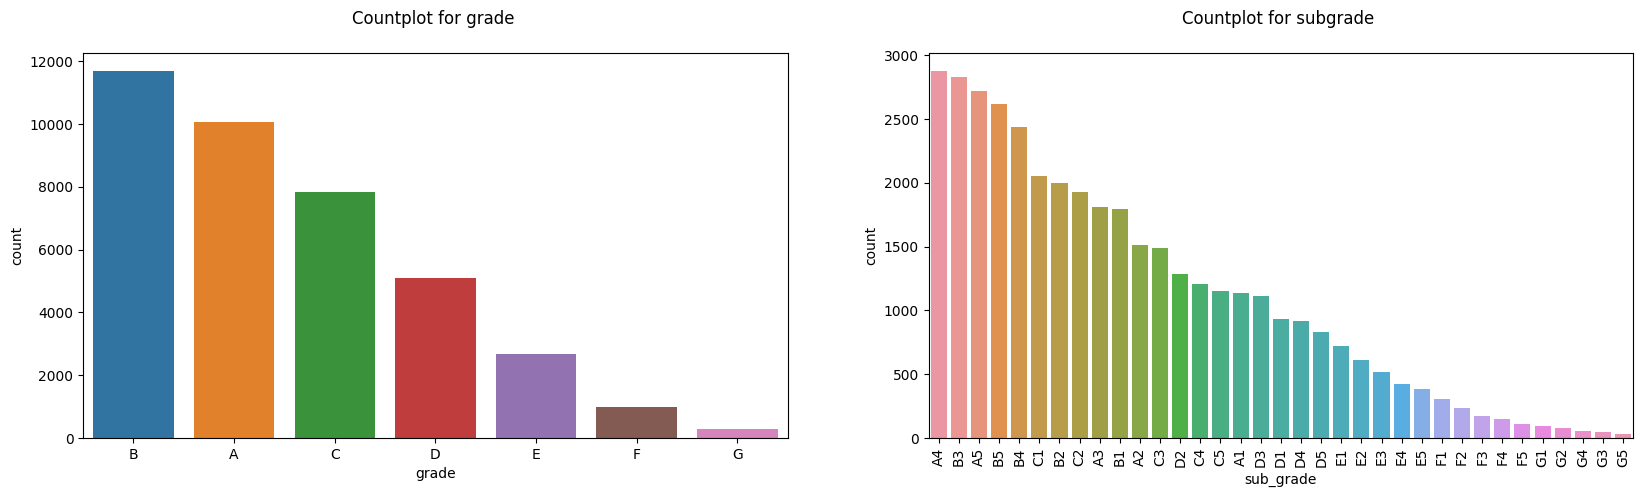

In [57]:
# for grade and subgrade
fig = plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title("Countplot for grade \n")
sns.countplot(df["grade"],order = df["grade"].value_counts().index)

plt.subplot(1,2,2)
plt.title("Countplot for subgrade \n")
sns.countplot(df["sub_grade"],order = df["sub_grade"].value_counts().index)
plt.xticks(rotation=90)


plt.show()

In [58]:
df[["grade","sub_grade"]].head(20)

,grade,sub_grade
0,B,B2
1,C,C4
2,C,C5
3,C,C1
5,A,A4
6,C,C5
7,E,E1
8,F,F2
9,B,B5
10,C,C3


### Since subgrade also composite of grade. We can remove grade column

In [59]:
df=df.drop("grade",axis=1)
df.shape

(38577, 16)

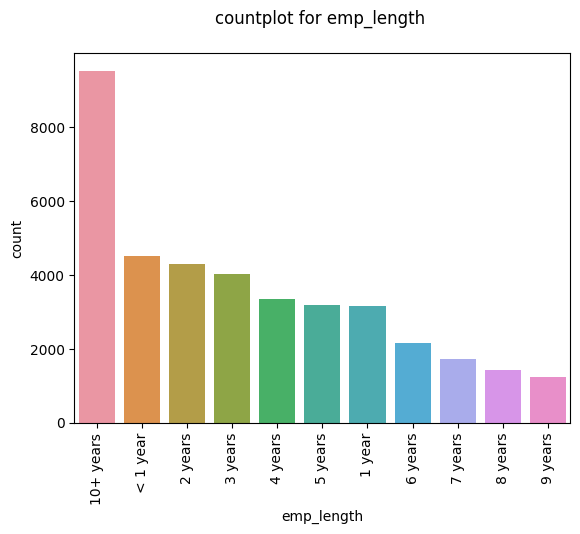

In [60]:
# for emp_length
plt.title("countplot for emp_length \n")
sns.countplot(df["emp_length"],order = df["emp_length"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

### Most number of employees have 10+ years of experience followed by <1 year of experience

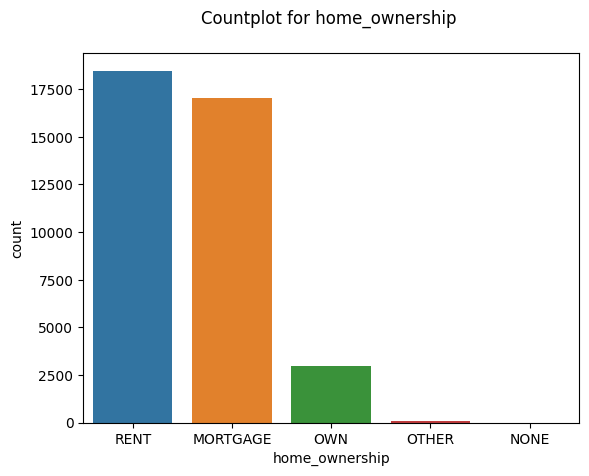

In [61]:
# for home_ownership
plt.title("Countplot for home_ownership \n")
sns.countplot(df["home_ownership"],order = df["home_ownership"].value_counts().index)
plt.show()

### Most loan applicant are those who have their home ownership as rented or mortgage

In [62]:
df[df["home_ownership"]=="OTHER"].shape


(98, 16)

In [63]:
df[df["home_ownership"]=="NONE"]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,issue_d_mnth
39318,10000,10000,1228.06,36 months,7.75,312.22,A3,5 years,NONE,22200.0,Not Verified,Fully Paid,debt_consolidation,VA,5.24,1
39659,4000,4000,1925.00,36 months,9.64,128.41,B4,< 1 year,NONE,100000.0,Not Verified,Fully Paid,other,CA,15.00,8
39660,2800,2800,1625.00,36 months,8.70,88.65,B1,< 1 year,NONE,120000.0,Not Verified,Fully Paid,other,MA,15.00,8


### Since home_ownership is equal to none does not make sense therefore removing these three rows

In [64]:
df=df[df["home_ownership"]!="NONE"]
df.shape

(38574, 16)

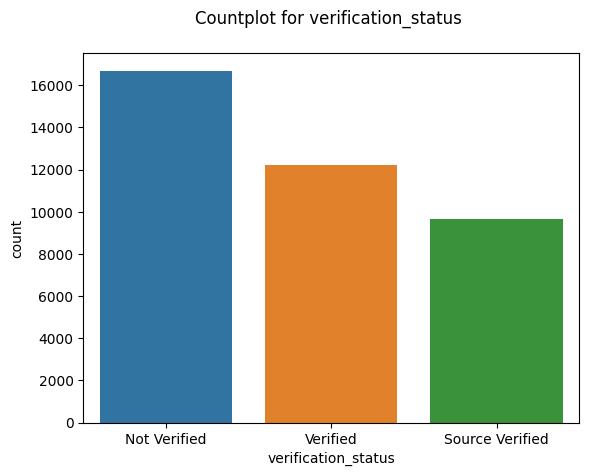

In [65]:
# for verification_status
plt.title("Countplot for verification_status \n")
sns.countplot(df["verification_status"],order = df["verification_status"].value_counts().index)
plt.show()

### Most of  applicants are not verified

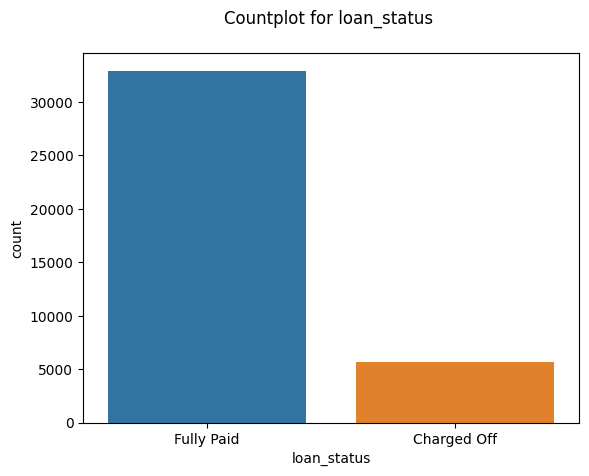

In [66]:
# for loan_status
plt.title("Countplot for loan_status \n")
sns.countplot(df["loan_status"], order = df["loan_status"].value_counts().index)
plt.show()

### Most of applicant have fully paid the loan

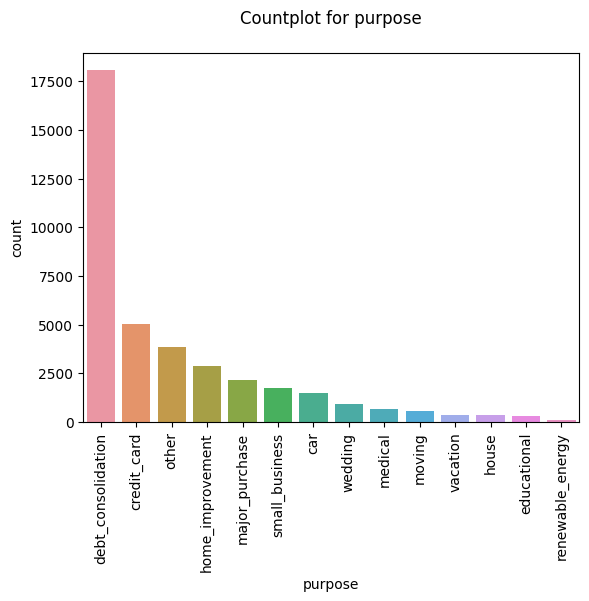

In [67]:
#for purpose
plt.title("Countplot for purpose\n")
sns.countplot(df["purpose"],order = df["purpose"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

### The reason of loan for most of applicant is debt_consolidation.

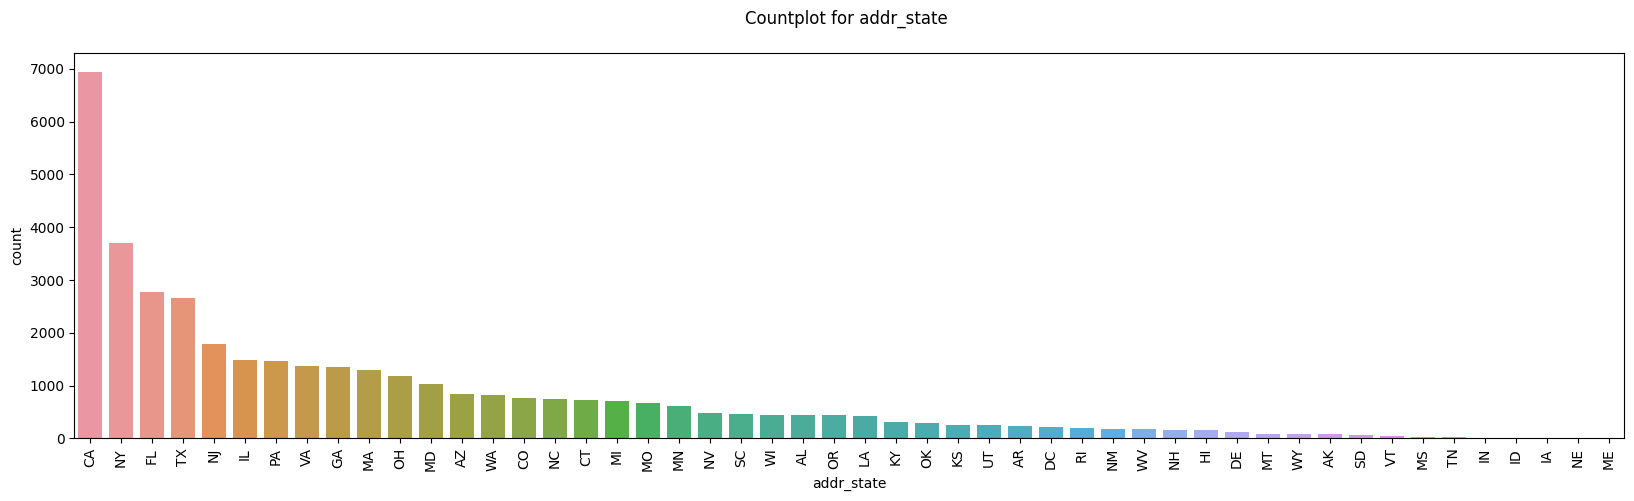

In [68]:
#for adress state
plt.figure(figsize=(20,5))
plt.title("Countplot for addr_state \n")
sns.countplot(df["addr_state"],order = df["addr_state"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

### Most of the applicants are from california followed by new york.

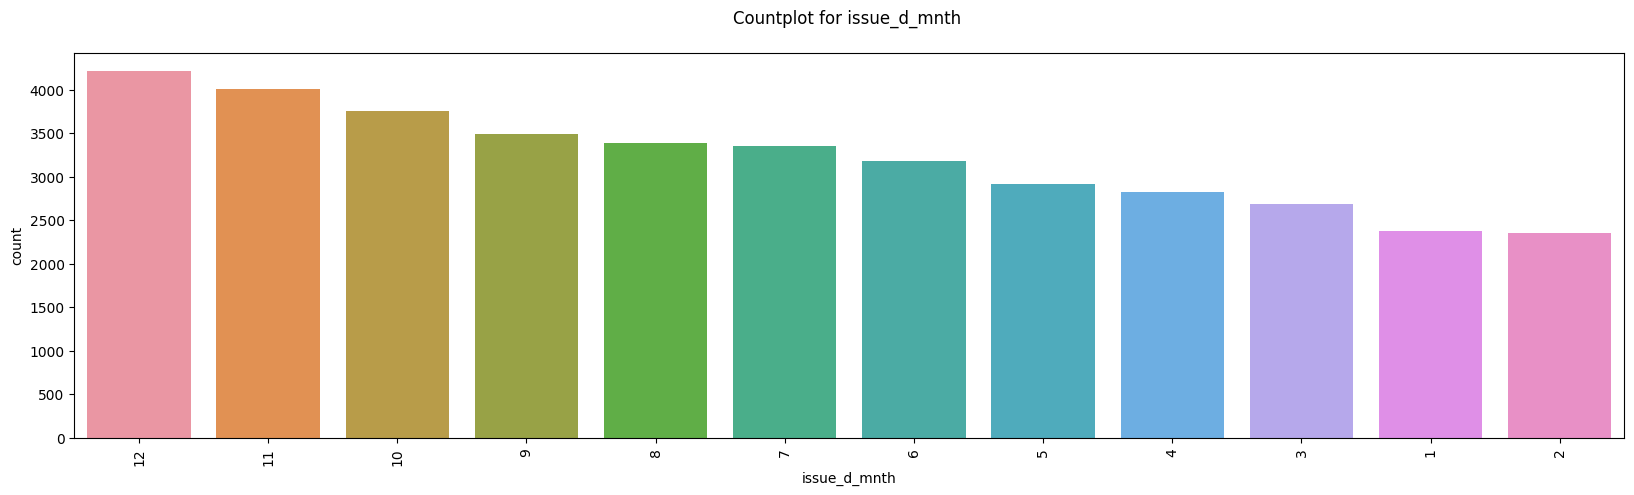

In [69]:
#for issue_d_mnth
plt.figure(figsize=(20,5))
plt.title("Countplot for issue_d_mnth \n")
sns.countplot(df["issue_d_mnth"],order = df["issue_d_mnth"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

### Continuous columns

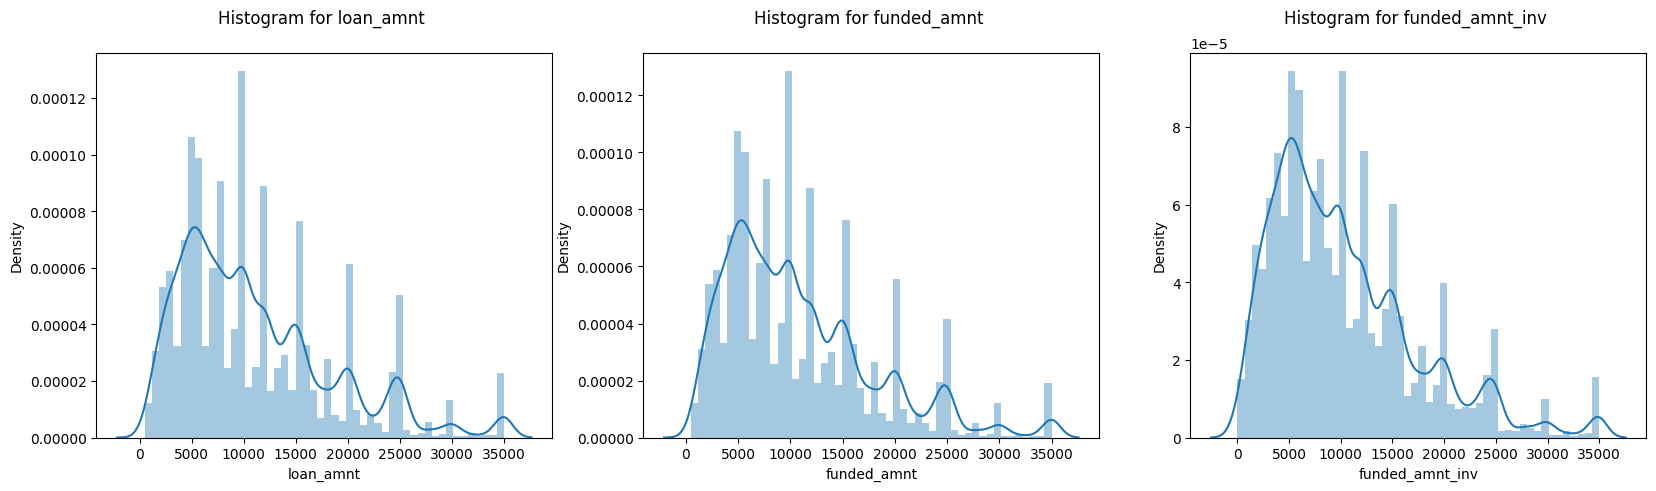

In [70]:
#for loan_amnt, funded_amnt, funded_amnt_inv
fig = plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.title("Histogram for loan_amnt \n")
sns.distplot(df["loan_amnt"])

plt.subplot(1,3,2)
plt.title("Histogram for funded_amnt \n")
sns.distplot(df["funded_amnt"])

plt.subplot(1,3,3)
plt.title("Histogram for funded_amnt_inv \n")
sns.distplot(df["funded_amnt_inv"])

plt.show()

### All of them seems to have same distribution and range

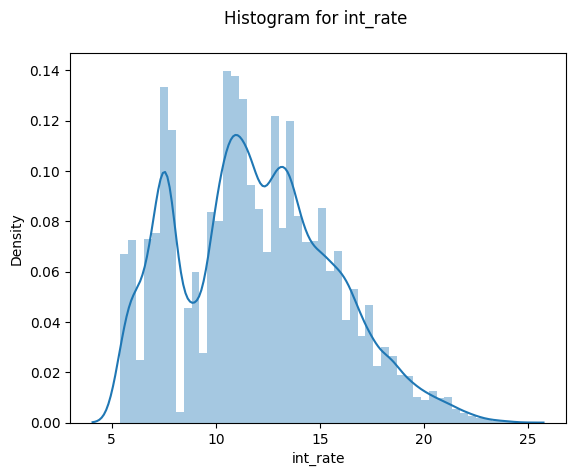

In [71]:
#for int_rate
plt.title("Histogram for int_rate \n")
sns.distplot(df["int_rate"])
plt.show()

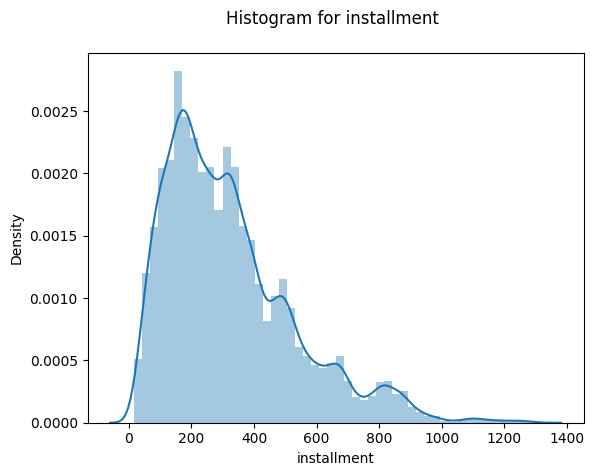

In [72]:
#for installments
plt.title("Histogram for installment \n")
sns.distplot(df["installment"])
plt.show()

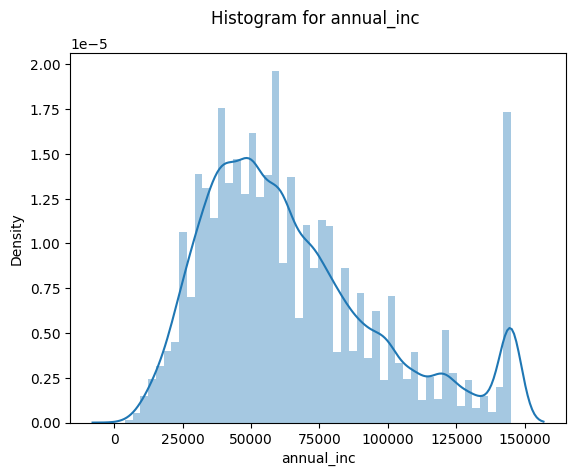

In [73]:
#for annual_inc
plt.title("Histogram for annual_inc \n")
sns.distplot(df["annual_inc"])
plt.show()

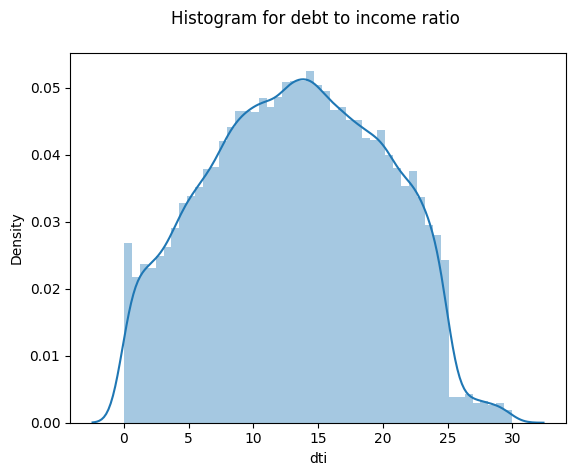

In [74]:
#for debt to income ratio
plt.title("Histogram for debt to income ratio \n")
sns.distplot(df["dti"])
plt.show()

### Univariate segmented and Bivariate Analysis

In [75]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose',
       'addr_state', 'dti', 'issue_d_mnth'],
      dtype='object')

### Continuous Continuos

In [76]:
# correlation matrix for loan_amnt,funded_amnt and funded_amnt_inv
df[["loan_amnt","funded_amnt","funded_amnt_inv"]].corr()

,loan_amnt,funded_amnt,funded_amnt_inv
loan_amnt,1.000000,0.981789,0.937934
funded_amnt,0.981789,1.000000,0.956186
funded_amnt_inv,0.937934,0.956186,1.000000


### Since there is very high correlation in all three we are keeping loan_amnt as it is variable that applicant will give and removing other two.

In [77]:
df=df.drop(["funded_amnt","funded_amnt_inv"],axis=1)
df.shape

(38574, 14)

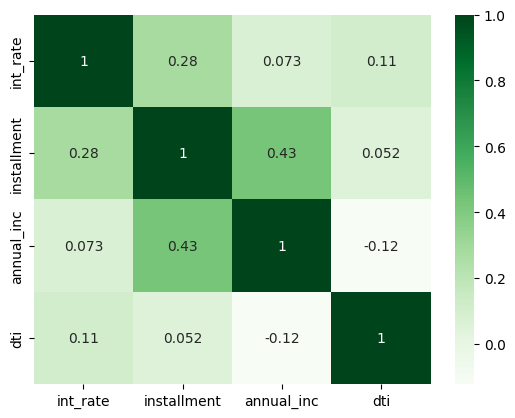

In [78]:
# correlation matrix using heatmap for int_rate,installment, annual_inc, dti
sns.heatmap(df[["int_rate","installment","annual_inc","dti"]].corr(),cmap="Greens",annot=True)
plt.show()

### There is no strong correlation anywhere so we cant drop any variable

In [79]:
df.shape

(38574, 14)

In [80]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'addr_state', 'dti', 'issue_d_mnth'],
      dtype='object')

### Categorical Continuous

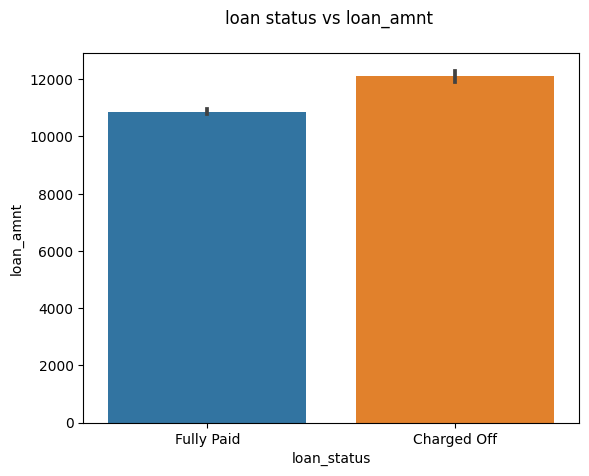

In [81]:
#loan status vs loan_amnt
plt.title("loan status vs loan_amnt \n")
sns.barplot(df["loan_status"],df["loan_amnt"],estimator=np.mean)
plt.show()

### If we want to see all percentile not only mean, we can plot boxplot.

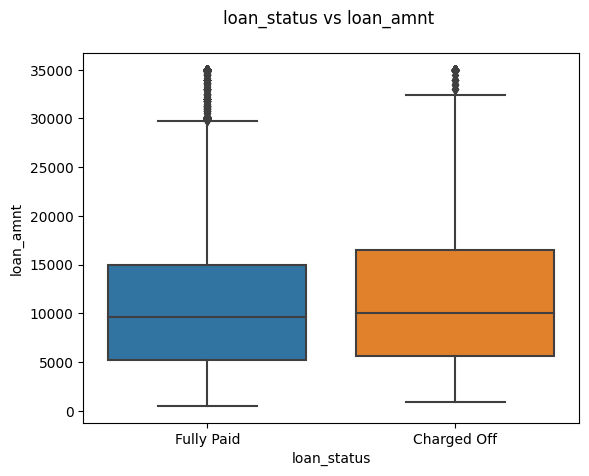

In [82]:
#loan_status vs loan_amnt
plt.title("loan_status vs loan_amnt \n")
sns.boxplot(df["loan_status"],df["loan_amnt"])
plt.show()

### Generally applicant who have taken loan of higher amount are likely to default but there is not very significant evidence.

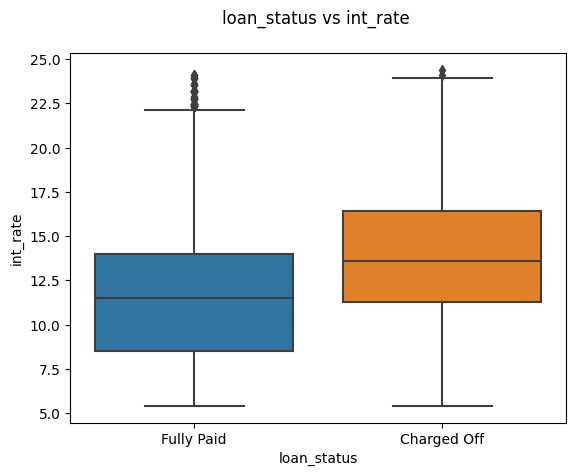

In [83]:
#loan_status vs int_rate
plt.title("loan_status vs int_rate \n")
sns.boxplot(df["loan_status"],df["int_rate"])
plt.show()

### Applicant who have higher int_rate  are likely to default.

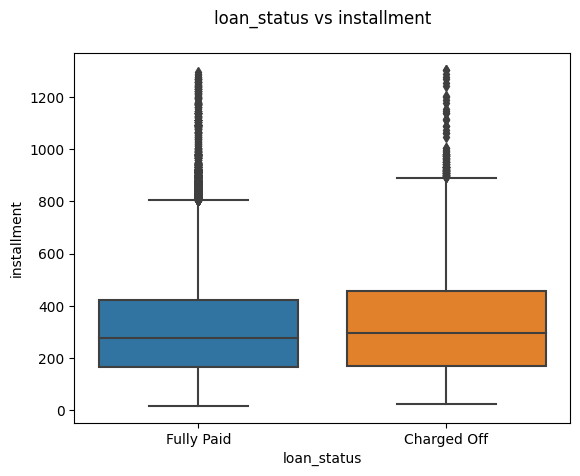

In [84]:
#loan_status vs installment
plt.title("loan_status vs installment\n")
sns.boxplot(df["loan_status"],df["installment"])
plt.show()

### There is no significant difference according to this criteria

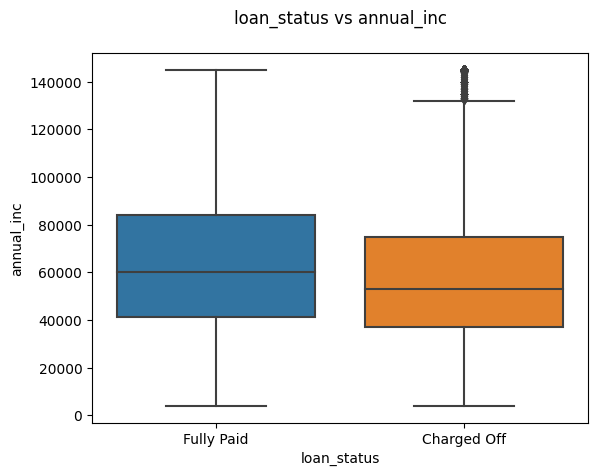

In [85]:
#loan_status vs annual_inc
plt.title("loan_status vs annual_inc\n")
sns.boxplot(df["loan_status"],df["annual_inc"])
plt.show()

### Applicant with less income are likely to default

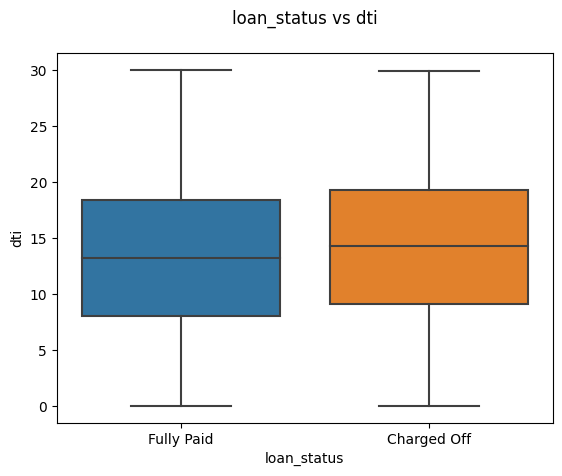

In [86]:
#loan_status vs dti
plt.title("loan_status vs dti\n")
sns.boxplot(df["loan_status"],df["dti"])
plt.show()

### There is no significant difference according to this criteria

### Categorical Categorical

In [87]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'addr_state', 'dti', 'issue_d_mnth'],
      dtype='object')

In [88]:
df.shape

(38574, 14)

In [89]:
# making a count column for creating pivot table and finding percentage of default and full paid across each category of categorical column.

In [90]:
df["count"]=1

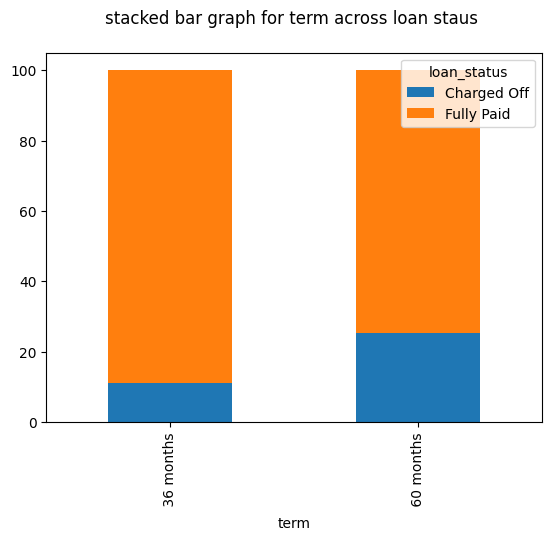

loan_status  Charged Off  Fully Paid
term                                
 36 months     11.092015   88.907985
 60 months     25.313785   74.686215


In [91]:
## stacked bar graph for term across loan staus
pt_term=pd.pivot_table(df,index="term",columns="loan_status",values="count",aggfunc=sum)
pt_term=pt_term[["Charged Off","Fully Paid"]].apply(lambda x: (x/x.sum())*100, axis=1)
pt_term.plot(kind="bar",stacked="True")
plt.title("stacked bar graph for term across loan staus \n")
plt.show()
print(pt_term)

### It is observed that applicant with 60 month loan term are more likely to default compare to 36 month term.

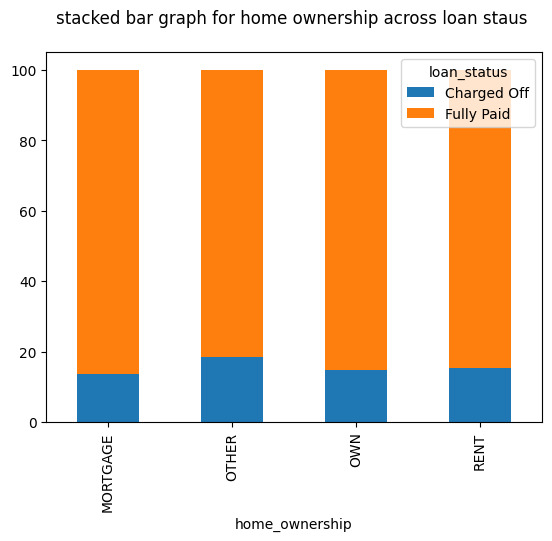

loan_status     Charged Off  Fully Paid
home_ownership                         
MORTGAGE          13.671347   86.328653
OTHER             18.367347   81.632653
OWN               14.890756   85.109244
RENT              15.362554   84.637446


In [92]:
##stacked bar graph for home ownership across loan staus
pt_homeownership=pd.pivot_table(df,index="home_ownership",columns="loan_status",values="count",aggfunc=sum)
pt_homeownership=pt_homeownership[["Charged Off","Fully Paid"]].apply(lambda x: (x/x.sum())*100, axis=1)
pt_homeownership.plot(kind="bar",stacked="True")
plt.title("stacked bar graph for home ownership across loan staus \n")
plt.show()
print(pt_homeownership)

### There is no significant difference, however applicant with other category have a higher chance of default

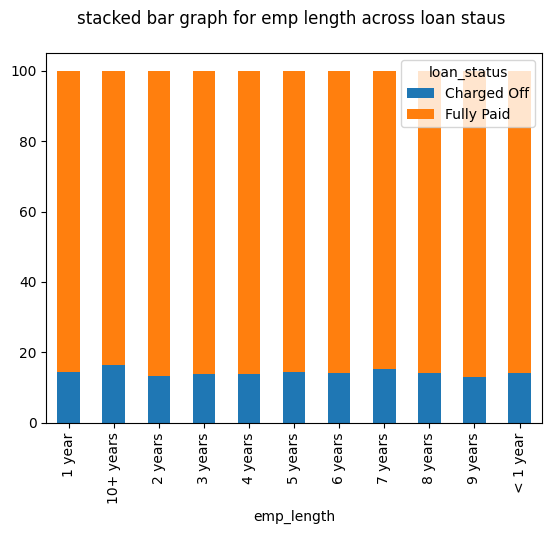

loan_status  Charged Off  Fully Paid
emp_length                          
1 year         14.389397   85.610603
10+ years      16.374330   83.625670
2 years        13.213703   86.786297
3 years        13.833500   86.166500
4 years        13.824057   86.175943
5 years        14.343877   85.656123
6 years        14.160517   85.839483
7 years        15.371128   84.628872
8 years        14.146341   85.853659
9 years        12.887439   87.112561
< 1 year       14.181092   85.818908


In [93]:
##stacked bar graph for emp length across loan staus
pt_emplength=pd.pivot_table(df,index="emp_length",columns="loan_status",values="count",aggfunc=sum)
pt_emplength=pt_emplength[["Charged Off","Fully Paid"]].apply(lambda x: (x/x.sum())*100, axis=1)
pt_emplength.plot(kind="bar",stacked="True")
plt.title("stacked bar graph for emp length across loan staus \n")
plt.show()
print(pt_emplength)

### There is no significant difference, however applicant with 10+years have a higher chance of default

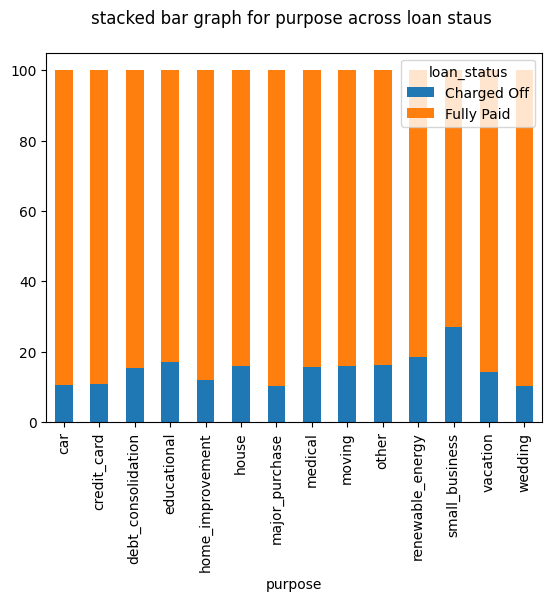

loan_status         Charged Off  Fully Paid
purpose                                    
car                   10.673783   89.326217
credit_card           10.781778   89.218222
debt_consolidation    15.326243   84.673757
educational           17.230769   82.769231
home_improvement      12.069565   87.930435
house                 16.076294   83.923706
major_purchase        10.325581   89.674419
medical               15.565345   84.434655
moving                15.972222   84.027778
other                 16.386228   83.613772
renewable_energy      18.627451   81.372549
small_business        27.080958   72.919042
vacation              14.133333   85.866667
wedding               10.367171   89.632829


In [94]:
##stacked bar graph for purpose across loan staus
pt_purpose=pd.pivot_table(df,index="purpose",columns="loan_status",values="count",aggfunc=sum)
pt_purpose=pt_purpose[["Charged Off","Fully Paid"]].apply(lambda x: (x/x.sum())*100, axis=1)
pt_purpose.plot(kind="bar",stacked="True")
plt.title("stacked bar graph for purpose across loan staus \n")
plt.show()
print(pt_purpose)

### There is significant difference in default percentage across purpose categories, with highest value in small business

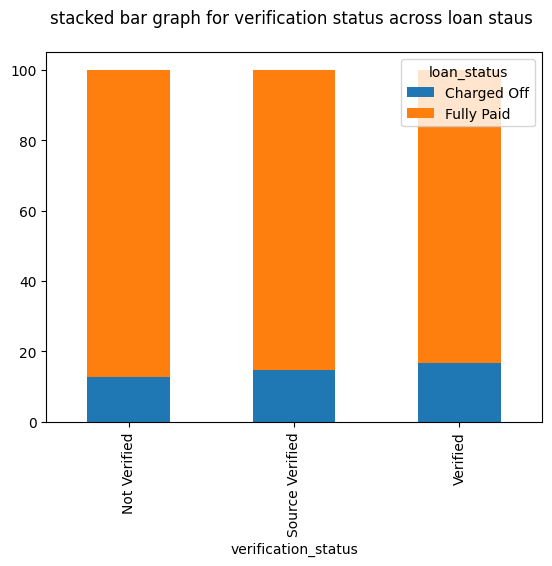

loan_status          Charged Off  Fully Paid
verification_status                         
Not Verified           12.833263   87.166737
Source Verified        14.818642   85.181358
Verified               16.803212   83.196788


In [95]:
##stacked bar graph for verification status across loan staus
pt_verificationstatus=pd.pivot_table(df,index="verification_status",columns="loan_status",values="count",aggfunc=sum)
pt_verificationstatus=pt_verificationstatus[["Charged Off","Fully Paid"]].apply(lambda x: (x/x.sum())*100, axis=1)
pt_verificationstatus.plot(kind="bar",stacked="True")
plt.title("stacked bar graph for verification status across loan staus \n")
plt.show()
print(pt_verificationstatus)

### There is no significant difference in defaulter percentage.

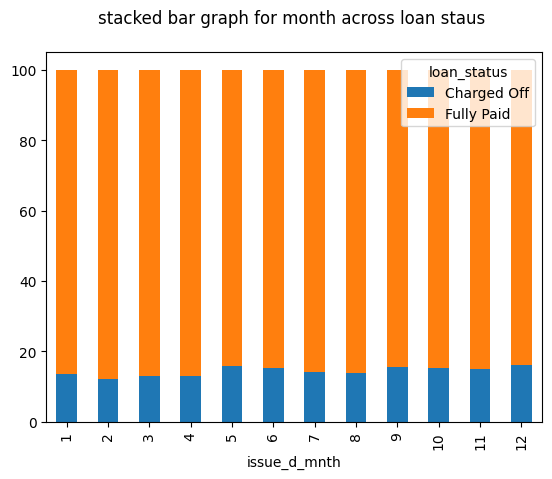

loan_status   Charged Off  Fully Paid
issue_d_mnth                         
1               13.498738   86.501262
2               12.298558   87.701442
3               12.894835   87.105165
4               13.069587   86.930413
5               15.964371   84.035629
6               15.188679   84.811321
7               14.294241   85.705759
8               13.821618   86.178382
9               15.637507   84.362493
10              15.421430   84.578570
11              14.927609   85.072391
12              16.085409   83.914591


In [96]:
##stacked bar graph for month across loan staus
pt_month=pd.pivot_table(df,index="issue_d_mnth",columns="loan_status",values="count",aggfunc=sum)
pt_month=pt_month[["Charged Off","Fully Paid"]].apply(lambda x: (x/x.sum())*100, axis=1)
pt_month.plot(kind="bar",stacked="True")
plt.title("stacked bar graph for month across loan staus \n")
plt.show()
print(pt_month)

### There is no significant difference

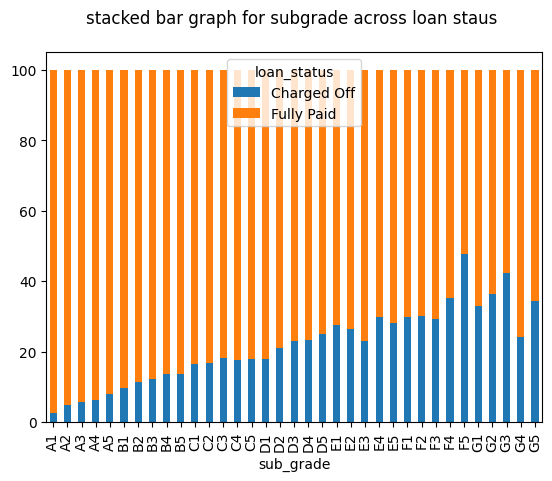

loan_status  Charged Off  Fully Paid
sub_grade                           
A1              2.633889   97.366111
A2              4.907162   95.092838
A3              5.693753   94.306247
A4              6.195614   93.804386
A5              7.992634   92.007366
B1              9.521158   90.478842
B2             11.394303   88.605697
B3             12.070796   87.929204
B4             13.505747   86.494253
B5             13.613767   86.386233
C1             16.350365   83.649635
C2             16.623511   83.376489
C3             18.145161   81.854839
C4             17.578773   82.421227
C5             18.024263   81.975737
D1             17.937701   82.062299
D2             21.073095   78.926905
D3             22.939068   77.060932
D4             23.420479   76.579521
D5             25.059952   74.940048
E1             27.423823   72.576177
E2             26.547231   73.452769
E3             23.062016   76.937984
E4             29.716981   70.283019
E5             28.165375   71.834625
F

In [97]:
##stacked bar graph for subgrade across loan staus
pt_subgrade=pd.pivot_table(df,index="sub_grade",columns="loan_status",values="count",aggfunc=sum)
pt_subgrade=pt_subgrade[["Charged Off","Fully Paid"]].apply(lambda x: (x/x.sum())*100, axis=1)
pt_subgrade.plot(kind="bar",stacked="True")
plt.title("stacked bar graph for subgrade across loan staus \n")
plt.show()
print(pt_subgrade)

### There is very high chance of default  if applicant fall under f and g categories especially f5 and g3.

## Conclusion:

### The 5 driving factors that are strong indicators of default are:

* Interest Rate: It is observed from the analysis that applicant who have been charged higher interest rate are more likely to default.
* Annual Income : It is observed from the analysis that applicant who have lower annual income are more likely to default.
* Term : It is observed that applicant with 60 month loan term are more likely to default compare to 36 month term.
* Purpose : There is significant difference in default percentage across purpose categories, with highest value in small business.
* Subgrade : There is very high chance of default  if applicant fall under f and g categories especially f5 and g3.

So from above observation it is recommended that if any applicant fall under these criteria, bank should not give them loan directly. They should do more investigation before approving loan and thus it will reduce credit loss.